In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import relu_utils as alg
#import kbrelu_utils as alg
import sigmoid_utils as alg
import mnist_utils as mu
import random

In [70]:
train_x, train_y = mu.get_train_data()

../train-images.idx3-ubyte


In [71]:
#zero mean, unit std, NOT neccesarry for non-natual images I guess.
#gaus_data = np.reshape(train_x, (1, train_x.shape[0]*train_x.shape[1]))
#gaus_mean = np.mean(gaus_data)
#gaus_std = np.std(gaus_data)

In [72]:
digit = 5
random.seed(0)
label_list = np.array(train_y).astype(int)
index_digit = np.where(label_list==digit)[0]
#index_digit = np.where(label_list>=6)[0]
train_num = len(index_digit)-1
index_train = index_digit[0:train_num]
Data_v = np.array(train_x[index_train]).astype(float)
Data_v = Data_v/255.

In [73]:
hid_num = 500
vis_num = Data_v.shape[1]
para = alg.init_para(vis_num, hid_num, 1e-3) #for sigmoid and ReLU
#para = alg.init_para(vis_num, hid_num, 1e-3, [1., 0., 0.2, 1., 0., 0.2]) #KReLU [vis_k, vis_bx, vis_by, hid_k, hid_bx, hid_by]
#para = alg.init_para(vis_num, hid_num, 1e-7) #for un-normalised ReLU
# Remember the update of the weights could not bigger than 1. So eta has to be really small.

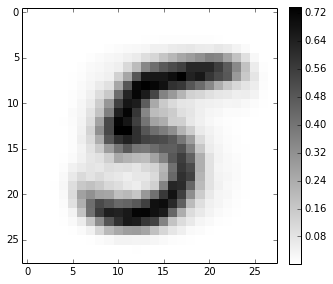

In [74]:
batch_size = 10
for iteration in range(5):
    for k in range(0,train_num,batch_size):
        max_bsize = min(train_num-k, batch_size)
        data_v = Data_v[k:k+max_bsize]
        #para = alg.update_batch_cd1(para, data_v)
        para = alg.update_batch_cd1(para, data_v, 0) #for Sigmoid
alg.plot_recon(train_x[index_digit[train_num]]/255., para)

22132.0


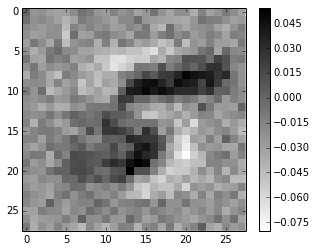

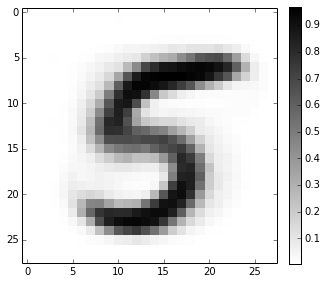

In [75]:
#calibrate on input rates and weights
import matplotlib.cm as cm
im = plt.imshow(np.reshape(para['w'][:,3],(28,28)), cmap=cm.gray_r,interpolation='none')
plt.colorbar(im, fraction=0.046, pad=0.04)
alg.plot_recon(train_x[index_digit[train_num]], para)
temp = train_x[index_digit[train_num]]
print temp.sum()

In [103]:
x = np.zeros((5,3))
x[0,1]=1
x[1,2]=1
x[3,0]=1
index = np.where(x.max(axis=1)>0)[0]
np.argmax(x[index], axis=1)
#print np.max(x, axis=1)==0, np.argmax(x, axis=1)

array([1, 2, 0])